https://www.youtube.com/watch?v=JpE4bYyRADI
(a partir del minuto 5:52 )

In [1]:
#necesito la version 2.15.0 (por default, usa la 2.14.0)
#!pip3 install tensorflow --upgrade
!pip install tensorflow==2.15.0

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.15.0'

In [4]:
!pip install tensorflow-decision-forests==1.8.0

  Using cached tensorflow_decision_forests-1.8.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (6.0 kB)
  Using cached pandas-2.3.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached wurlitzer-3.1.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached tensorflow_decision_forests-1.8.0-cp311-cp311-macosx_12_0_arm64.whl (11.5 MB)
Using cached pandas-2.3.3-cp311-cp311-macosx_11_0_arm64.whl (10.8 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
Using cached wurlitzer-3.1.1-py3-none-any.whl (8.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [tensorflow-decision-forests]-decision-forests]


In [5]:
#nvcc --version

In [6]:
# Montar Google Drive
#from google.colab import drive
#drive.mount('/gdrive')

In [8]:
!pip install tensorflow_datasets

  Using cached tensorflow_datasets-4.9.9-py3-none-any.whl.metadata (11 kB)
  Using cached dm_tree-0.1.9-cp311-cp311-macosx_10_9_universal2.whl.metadata (2.4 kB)
  Using cached etils-1.13.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached immutabledict-4.2.1-py3-none-any.whl.metadata (3.5 kB)
  Using cached promise-2.3-py3-none-any.whl
  Using cached pyarrow-21.0.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (3.3 kB)
  Using cached simple_parsing-0.1.7-py3-none-any.whl.metadata (7.3 kB)
  Using cached tensorflow_metadata-1.17.2-py3-none-any.whl.metadata (2.5 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached einops-0.8.1-py3-none-any.whl.metadata (13 kB)
  Using cached fsspec-2025.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
  Using cached zipp-3.23.0-py3-none-any.whl.metadata (3.6 kB)
  Using cached attrs-25.3.0-py3-none-any

In [9]:
import math
import tensorflow_datasets as tfds

In [10]:
#Funcion de normalizacion para los datos (Pasar valor de los pixeles de 0-255 a 0-1)
#Hace que la red aprenda mejor y mas rapido
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 #Aqui lo pasa de 0-255 a 0-1
  return imagenes, etiquetas

In [11]:
#Descargar set de datos de MNIST (Numeros escritos a mano, etiquetados)
datos, metadatos = tfds.load('mnist', as_supervised=True, with_info=True)

#Obtenemos en variables separadas los datos de entrenamiento (60k) y pruebas (10k)
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

2025-10-05 19:15:36.766235: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-10-05 19:15:36.766289: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-10-05 19:15:36.766307: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-10-05 19:15:36.766378: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-10-05 19:15:36.766432: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
datos

{'train': <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'test': <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [13]:
#Etiquetas de las 10 categorias posibles (simplemente son los numeros del 0 al 9)
nombres_clases = metadatos.features['label'].names

In [14]:
nombres_clases

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [15]:
#Normalizar los datos de entrenamiento y pruebas con la funcion que hicimos
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

In [16]:
#Agregar a cache (usar memoria en lugar de disco, entrenamiento mas rapido)
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

In [17]:
datos_entrenamiento

<CacheDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [18]:
#Crear el modelo
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Para redes de clasificacion
])

In [19]:
#Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [20]:
#Los numeros de datos en entrenamiento y pruebas (60k y 10k)
num_ej_entrenamiento = metadatos.splits["train"].num_examples
num_ej_pruebas = metadatos.splits["test"].num_examples

#El trabajo por lotes permite que entrenamientos con gran cantidad de datos se haga de manera mas eficiente
TAMANO_LOTE = 32

In [21]:
#Shuffle y repeat hacen que los datos esten mezclados de manera aleatoria para que la red
#no se vaya a aprender el orden de las cosas
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

In [22]:
# tiempo estimado 6 mins
%time historial = modelo.fit(datos_entrenamiento, epochs=20, validation_data=datos_pruebas, steps_per_epoch= math.ceil(num_ej_entrenamiento/TAMANO_LOTE), verbose=1 )

Epoch 1/20


2025-10-05 19:15:53.897763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 22s 9ms/step - loss: 3.7378 - accuracy: 0.7062 - val_loss: 4.0082 - val_accuracy: 0.8591
Epoch 2/20
1875/1875 [==============================] - 16s 9ms/step - loss: 115.0106 - accuracy: 0.7059 - val_loss: 191.6370 - val_accuracy: 0.7677
Epoch 3/20
1875/1875 [==============================] - 16s 8ms/step - loss: 678.9518 - accuracy: 0.7243 - val_loss: 553.0920 - val_accuracy: 0.8375
Epoch 4/20
1875/1875 [==============================] - 17s 9ms/step - loss: 2005.6472 - accuracy: 0.7256 - val_loss: 1354.1395 - val_accuracy: 0.8532
Epoch 5/20
1875/1875 [==============================] - 16s 9ms/step - loss: 4242.4399 - accuracy: 0.7297 - val_loss: 3526.2383 - val_accuracy: 0.8236
Epoch 6/20
1875/1875 [==============================] - 16s 8ms/step - loss: 7974.4658 - accuracy: 0.7283 - val_loss: 3566.9099 - val_accuracy: 0.8644
Epoch 7/20
1875/1875 [==============================] - 15s 8ms/step - loss: 12203.1143 - accuracy: 0.7307 - val_lo

In [23]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

In [25]:
!pip install matplotlib

  Using cached matplotlib-3.10.6-cp311-cp311-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp311-cp311-macosx_10_9_universal2.whl.metadata (112 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.6-cp311-cp311-macosx_11_0_arm64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp311-cp311-macosx_11_0_arm64.whl (270 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.1-cp311-cp311-macosx_10_9_universal2.whl (2.8 MB)
Using cached kiwisolver-1.4.9-cp311-cp311-macosx_11_0_arm64.whl (65 kB)
Using cached pillow-11.3.0-cp311-cp311-macosx_11_0_arm64.whl (4.7 MB)
Using cached pyparsing-3.2.5-p

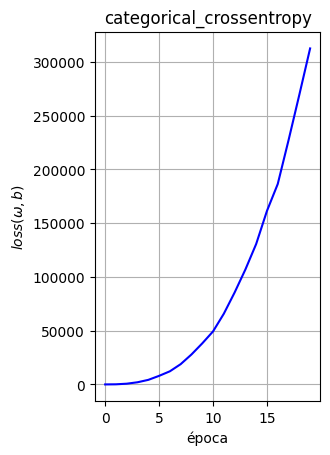

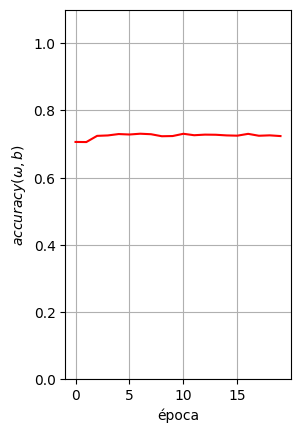

In [26]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.plot(historial.epoch,historial.history['loss'], 'b',label='error')
plt.title(u'categorical_crossentropy')
plt.xlabel(u'época')
plt.ylabel(r'$loss(\omega, b)$')
plt.grid(True)
#plt.legend(loc='upper right')
plt.show()

plt.subplot(1,2,2)
plt.plot(historial.epoch,historial.history['accuracy'], 'r',label='precisión')
#plt.title(u'categorical_crossentropy')
plt.xlabel(u'época')
plt.ylabel(r'$accuracy(\omega, b)$')
plt.ylim([0,1.1])
plt.grid(True)
#plt.legend(loc='lower right')
plt.show()

#Exportar el modelo a TensorFlow.js

In [27]:
%pip install tensorflowjs

  Using cached tensorflowjs-4.22.0-py3-none-any.whl.metadata (3.2 kB)
  Using cached flax-0.12.0-py3-none-any.whl.metadata (11 kB)
  Using cached jax-0.7.2-py3-none-any.whl.metadata (13 kB)
  Using cached jaxlib-0.7.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (1.3 kB)
  Using cached tf_keras-2.20.1-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorflow_hub-0.16.1-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached packaging-23.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached msgpack-1.1.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (8.4 kB)
  Using cached optax-0.2.6-py3-none-any.whl.metadata (7.6 kB)
  Using cached orbax_checkpoint-0.11.25-py3-none-any.whl.metadata (2.3 kB)
  Using cached tensorstore-0.1.77-cp311-cp311-macosx_11_0_arm64.whl.metadata (21 kB)
  Using cached rich-14.1.0-py3-none-any.whl.metadata (18 kB)
  Using cached pyyaml-6.0.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (2.4 kB)
  Using cached treescope-0.1.10-py3-none-any.whl.metadata (6.6 kB)
INFO: pip is

In [28]:
import sys
print("Python version:", sys.version)
import keras
print("Keras version:", keras.__version__)
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

Python version: 3.11.13 (main, Jun  3 2025, 18:38:25) [Clang 17.0.0 (clang-1700.0.13.3)]
Keras version: 2.15.0
TensorFlow version: 2.15.0


In [29]:
#Exportar el modelo en formato h5
modelo.save('numeros_RegularNet.h5')

/Users/ivana/IA-projects/mnist_intento2/nums/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
#Para convertirlo a tensorflow.js, primero debemos instalar la libreria
#!pip install tensorflowjs --use-deprecated=legacy-resolver

In [31]:
#Crear carpeta donde se colocaran los archivos resultantes
!mkdir carpeta_salida

In [35]:
#Realizar la exportacion a la carpeta de salida
!tensorflowjs_converter --input_format keras numeros_RegularNet.h5 carpeta_salida/regular

/Users/ivana/IA-projects/mnist_intento2/nums/lib/python3.11/site-packages/tensorflow_hub/__init__.py:61: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


In [33]:
#Confirmar que en la carpeta de salida se hayan generado los archivos. Deben aparecer archivos "bin" y "json"
!ls -la carpeta_salida

total 5736
drwxr-xr-x@ 4 ivana  staff      128 Oct  5 20:01 .
drwxr-xr-x  6 ivana  staff      192 Oct  5 20:01 ..
-rw-r--r--@ 1 ivana  staff  2926120 Oct  5 20:01 group1-shard1of1.bin
-rw-r--r--@ 1 ivana  staff     4435 Oct  5 20:01 model.json


In [34]:
#!rm /content/carpeta_salida/group1-shard1of1.bin

In [ ]:
#!rm /content/carpeta_salida/model.json



---



---



En la línea de comandos, en el directorio donde está el archivo **index.html** del proyecto



```
python -m http.server 8000
```



En el navegador



```
localhost:8000/index.html
```






---



---



Ejecuta el comando



```
ngrok http http://localhost:8000
```



